PART 1: K-MEANS STRATEGIC SEGMENTATION (k=3)
K-Means Cluster Sizes:
Cluster
0    3272
1    2858
2    2820
Name: count, dtype: int64

--- K-Means Cluster Profiles (Feature Averages) ---
         BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                            
0        2021.27               0.98    2160.55           1418.88   
1        2436.72               0.92     114.75             69.35   
2         150.46               0.72     560.78            163.66   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                        741.84        605.97                 0.76   
1                         45.55       2325.84                 0.09   
2                        397.73         46.43                 0.58   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                           

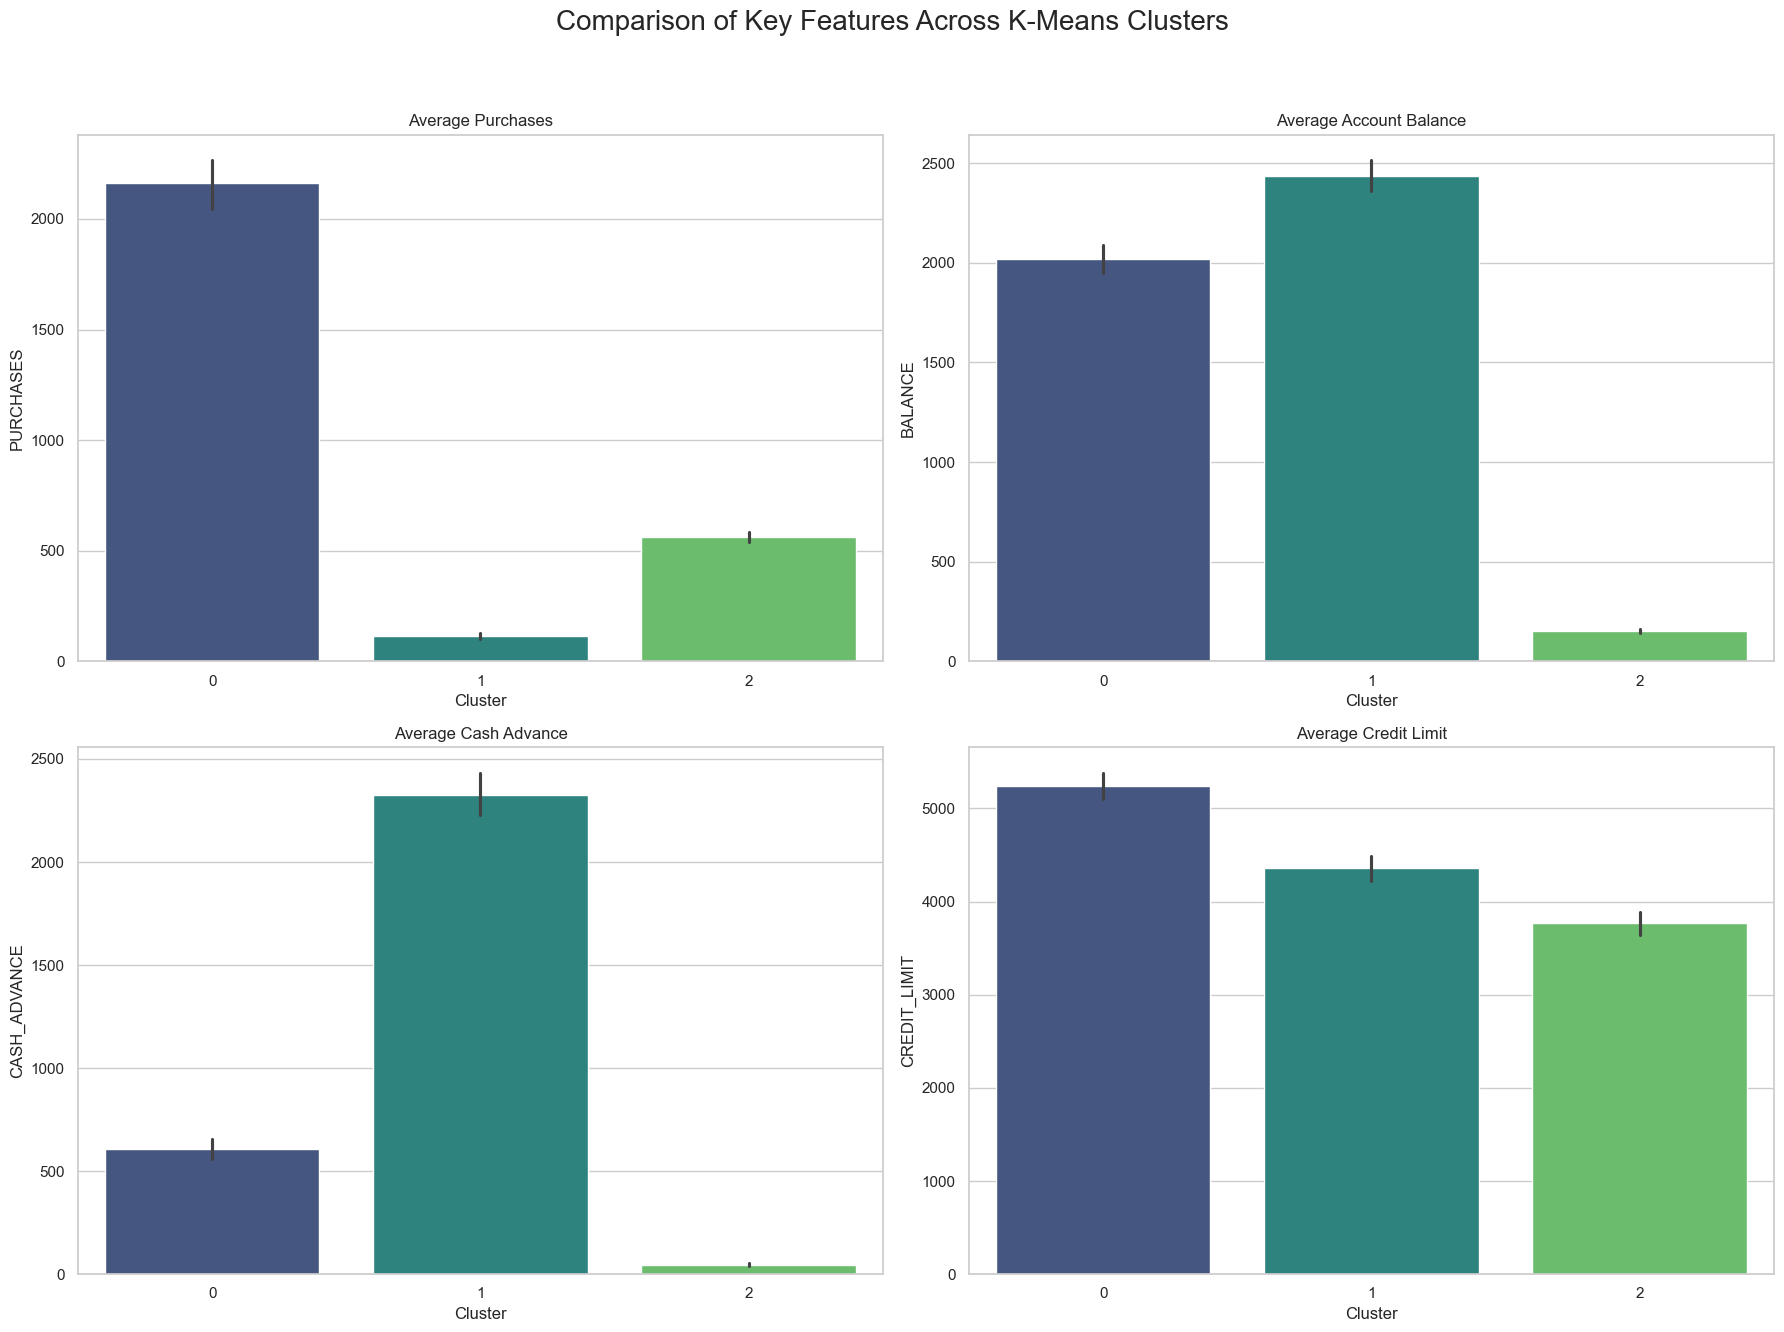

In [11]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

warnings.filterwarnings('ignore')

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 7) # Set default figure size


df_final = pd.read_csv('..\data\KMeansclustered_customers.csv')


# --- Part 1: K-Means Analysis (Strategic View) ---

print("PART 1: K-MEANS STRATEGIC SEGMENTATION (k=3)")

# Display the size of each K-Means cluster
print("K-Means Cluster Sizes:")
print(df_final['Cluster'].value_counts())


kmeans_features = [col for col in df_final.columns if col not in ['Cluster', 'CUST_ID']]

kmeans_summary = df_final.groupby('Cluster')[kmeans_features].mean().round(2)
print("\n--- K-Means Cluster Profiles (Feature Averages) ---")
print(kmeans_summary)

# Visualize the key differences between the 3 K-Means clusters
print("\n--- Visualizing K-Means Cluster Differences ---")
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Comparison of Key Features Across K-Means Clusters', fontsize=20)

sns.barplot(ax=axes[0, 0], data=df_final, x='Cluster', y='PURCHASES', palette='viridis')
axes[0, 0].set_title('Average Purchases')

sns.barplot(ax=axes[0, 1], data=df_final, x='Cluster', y='BALANCE', palette='viridis')
axes[0, 1].set_title('Average Account Balance')

sns.barplot(ax=axes[1, 0], data=df_final, x='Cluster', y='CASH_ADVANCE', palette='viridis')
axes[1, 0].set_title('Average Cash Advance')

sns.barplot(ax=axes[1, 1], data=df_final, x='Cluster', y='CREDIT_LIMIT', palette='viridis')
axes[1, 1].set_title('Average Credit Limit')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



In [13]:



print("PART 2: DBSCAN TACTICAL SEGMENTATION")

df_final = pd.read_csv('..\data\DBScanclustered_customers.csv')
print("--- DBSCAN Results ---")
n_clusters_db = len(set(df_final['Cluster'])) - (1 if -1 in df_final['Cluster'].unique() else 0)
n_noise_db = df_final['Cluster'].value_counts().get(-1, 0)
print(f"Estimated number of clusters: {n_clusters_db}")
print(f"Estimated number of noise points (outliers): {n_noise_db}")
print("\nDBSCAN Cluster Sizes (Cluster -1 = Outliers):")
print(df_final['Cluster'].value_counts().head(10)) 

outliers_df = df_final[df_final['Cluster'] == -1]
print("\n--- Profile of DBSCAN Outliers (Cluster -1) ---")

outlier_summary = {
    'Metric': ['Avg. Balance', 'Avg. Purchases', 'Avg. Cash Advance', 'Avg. Credit Limit'],
    'Outliers': [
        outliers_df['BALANCE'].mean(),
        outliers_df['PURCHASES'].mean(),
        outliers_df['CASH_ADVANCE'].mean(),
        outliers_df['CREDIT_LIMIT'].mean()
    ],
    'Total Population': [
        df_final['BALANCE'].mean(),
        df_final['PURCHASES'].mean(),
        df_final['CASH_ADVANCE'].mean(),
        df_final['CREDIT_LIMIT'].mean()
    ]
}
comparison_df = pd.DataFrame(outlier_summary).round(2)
print(comparison_df)




PART 2: DBSCAN TACTICAL SEGMENTATION
--- DBSCAN Results ---
Estimated number of clusters: 4
Estimated number of noise points (outliers): 489

DBSCAN Cluster Sizes (Cluster -1 = Outliers):
Cluster
 0    8439
-1     489
 1      13
 3       5
 2       4
Name: count, dtype: int64

--- Profile of DBSCAN Outliers (Cluster -1) ---
              Metric  Outliers  Total Population
0       Avg. Balance   3469.31           1564.47
1     Avg. Purchases   3311.59           1003.20
2  Avg. Cash Advance   4103.07            978.87
3  Avg. Credit Limit   7062.00           4494.28



--- Visualizing DBSCAN Core Cluster Differences ---


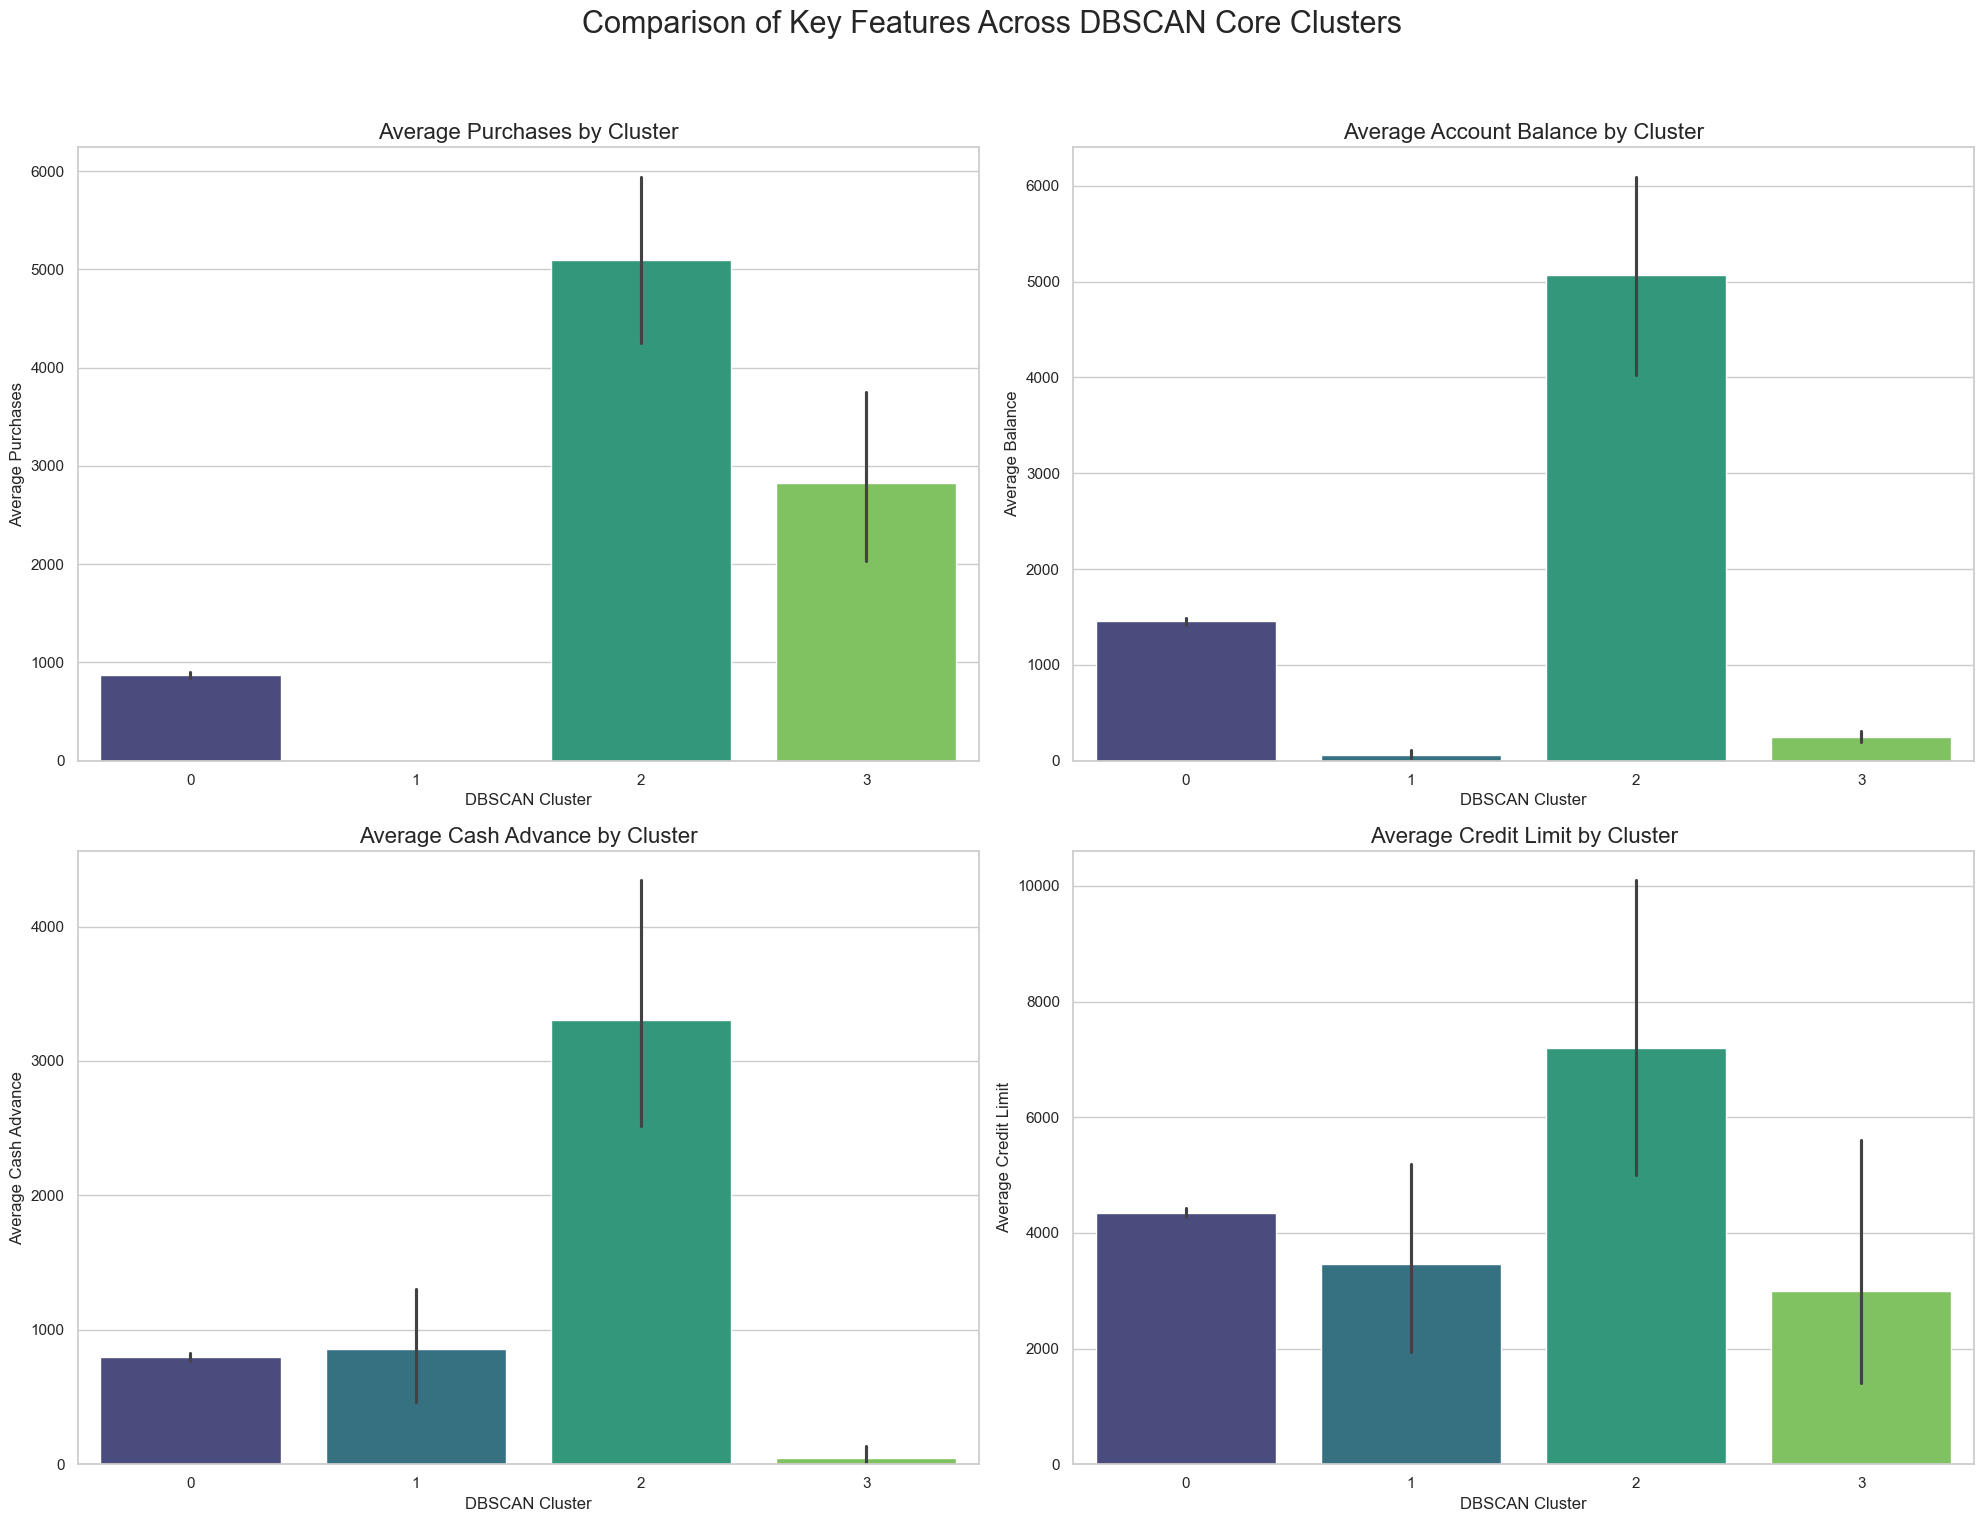

In [9]:


print("\n--- Visualizing DBSCAN Core Cluster Differences ---")

core_clusters_df = df_final[df_final['Cluster'] != -1]


if core_clusters_df.empty:
    print("No core clusters were found by DBSCAN to visualize.")
else:
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    fig.suptitle('Comparison of Key Features Across DBSCAN Core Clusters', fontsize=22)

    sns.barplot(ax=axes[0, 0], data=core_clusters_df, x='Cluster', y='PURCHASES', palette='viridis')
    axes[0, 0].set_title('Average Purchases by Cluster', fontsize=16)
    axes[0, 0].set_xlabel('DBSCAN Cluster', fontsize=12)
    axes[0, 0].set_ylabel('Average Purchases', fontsize=12)

    # Plot 2: Average Account Balance
    sns.barplot(ax=axes[0, 1], data=core_clusters_df, x='Cluster', y='BALANCE', palette='viridis')
    axes[0, 1].set_title('Average Account Balance by Cluster', fontsize=16)
    axes[0, 1].set_xlabel('DBSCAN Cluster', fontsize=12)
    axes[0, 1].set_ylabel('Average Balance', fontsize=12)

    # Plot 3: Average Cash Advance
    sns.barplot(ax=axes[1, 0], data=core_clusters_df, x='Cluster', y='CASH_ADVANCE', palette='viridis')
    axes[1, 0].set_title('Average Cash Advance by Cluster', fontsize=16)
    axes[1, 0].set_xlabel('DBSCAN Cluster', fontsize=12)
    axes[1, 0].set_ylabel('Average Cash Advance', fontsize=12)

    sns.barplot(ax=axes[1, 1], data=core_clusters_df, x='Cluster', y='CREDIT_LIMIT', palette='viridis')
    axes[1, 1].set_title('Average Credit Limit by Cluster', fontsize=16)
    axes[1, 1].set_xlabel('DBSCAN Cluster', fontsize=12)
    axes[1, 1].set_ylabel('Average Credit Limit', fontsize=12)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

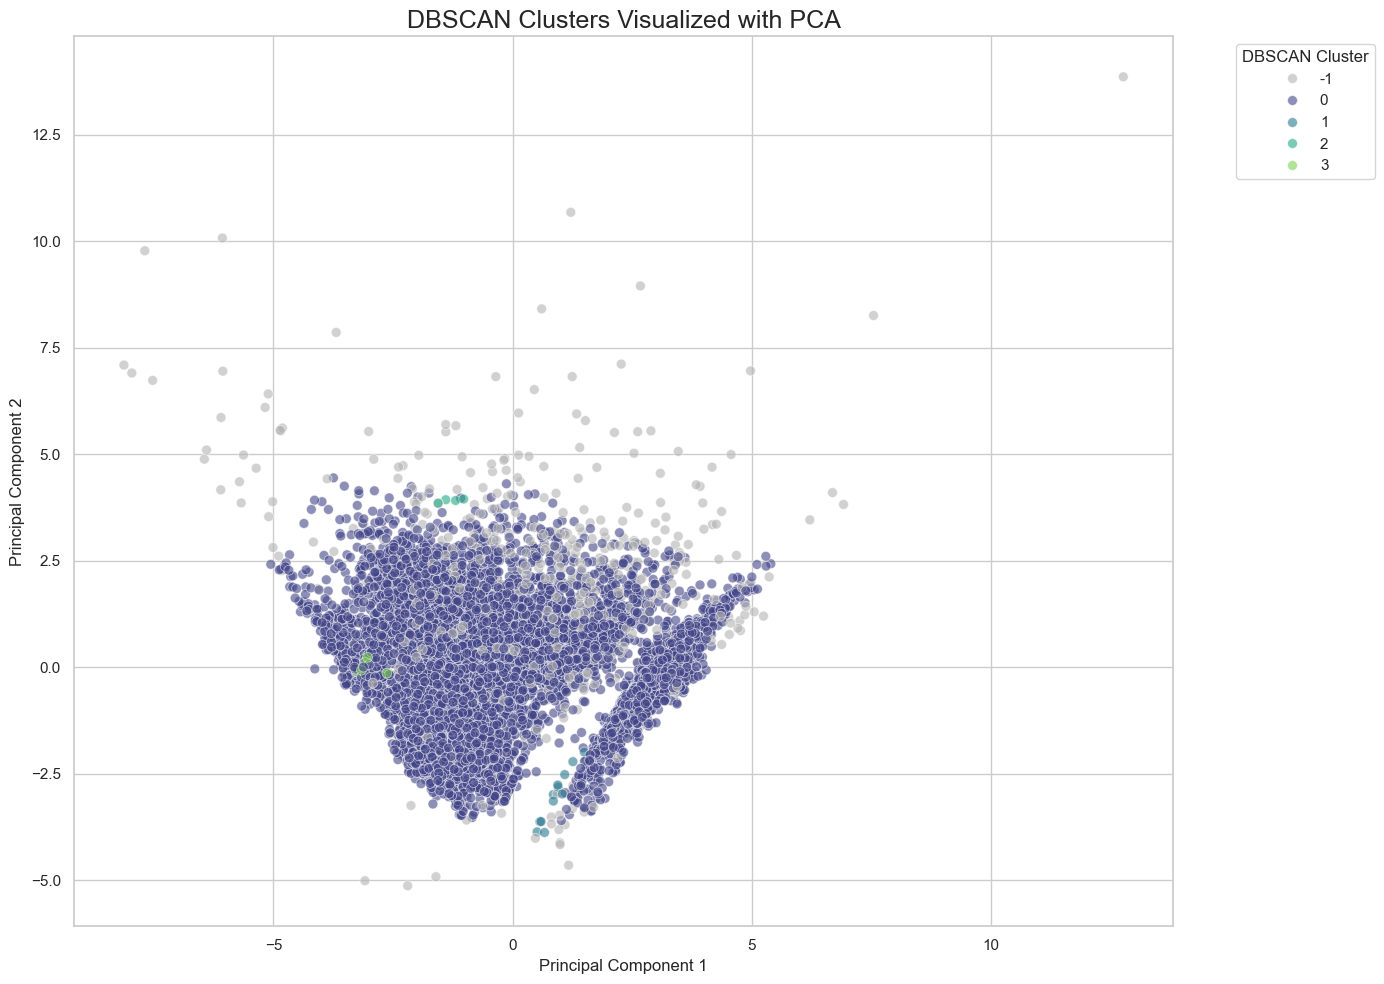

In [10]:
X_pca = pd.read_csv("..\data\pca_features_for_clustering.csv")
plot_df_dbscan = pd.DataFrame({
    'PC1': X_pca['PC_1'],
    'PC2': X_pca['PC_2'],
    'DBSCAN_Cluster': df_final['Cluster']
})


unique_labels = sorted(plot_df_dbscan['DBSCAN_Cluster'].unique())


core_cluster_labels = [label for label in unique_labels if label != -1]
palette = sns.color_palette("viridis", n_colors=len(core_cluster_labels))


palette_dict = {label: color for label, color in zip(core_cluster_labels, palette)}
palette_dict[-1] = (0.7, 0.7, 0.7) 
plt.figure(figsize=(14, 10))
sns.scatterplot(
    data=plot_df_dbscan,
    x='PC1',
    y='PC2',
    hue='DBSCAN_Cluster',
    palette=palette_dict,
    s=50,          
    alpha=0.6,     
    legend='full'
)

plt.title('DBSCAN Clusters Visualized with PCA', fontsize=18)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='DBSCAN Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()